In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines
    
c_nc, n_nc =load_chain_info('/project/chihway/data/decade/chains/fiducial-cuts.txt')
c_cc, n_cc =load_chain_info('/project/chihway/data/decade/chains/chihway/fiducial-cuts.txt')

[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] a2
[16] alpha1
[17] alpha2
[18] bias_ta
[19] SIGMA_8
[20] SIGMA_12
[21] 2PT_CHI2
[22] log_weight
[23] prior
[24] post

23900
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] a2
[16] alpha1
[17] alpha2
[18] bias_ta
[19] SIGMA_8
[20] SIGMA_12
[21] 2PT_CHI2
[22] log_weight
[23] prior
[24] post

20000


Removed no burn in
Removed no burn in


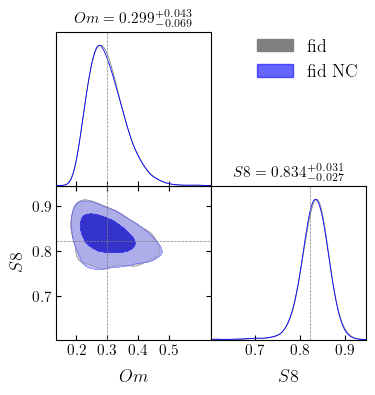

In [6]:
fid = MCSamples(samples = np.c_[c_cc[:,0],c_cc[:,19]*np.sqrt(c_cc[:,0]/0.3)],
                weights = np.exp(c_cc[:,22]),
                names   = ['omegam','S8'],
                labels  = ['Om','S8'],
                label   = "delve")

fid_nc = MCSamples(samples = np.c_[c_nc[:,0],c_nc[:,19]*np.sqrt(c_nc[:,0]/0.3)],
                weights = np.exp(c_nc[:,22]),
                names   = ['omegam','S8'],
                labels  = ['Om','S8'],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=4)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid, fid_nc],
                ['omegam','S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["fid", "fid NC"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'],    
                title_limit=1, 
                markers={'omegam':0.3, 'S8': 0.82355}# first title limit (for 1D plots) is 68% by default
                )

mplot.show()